# classifier 중에서도 tree 계열을 봅시다.
오늘은 일단 간단한 feature engineering을 하고, 결과를 낼 수 있으면 됩니다.  
decision tree, random forest에 대해서 더 공부하고 싶은 분은 복습하면서 중간중간 써놓은 참고자료를 봐주세요.

# Install guide
Decision tree를 그려보기 위한 작업입니다. 지금 안해도 돼요. 집에가서 복습할 때 해보세요!

## Mac에서 graphviz 설치하기
* homebrew 설치 `/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/
install)”`
* graphviz 설치 `brew install graphviz`
* 파이썬 graphviz 패키지 설치 `pip install graphviz`, `pip3 install graphviz` or `conda install graphviz`

## Window 에서 graphviz 설치하기
* graphviz window 버전 설치: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
* 설치시 경로를 `C:₩Program Files (x86)₩Graphviz2.38`로 할 것
* PATH 설정을 위해 주피터 노트북에서 Python3 노트를 열어 아래 코드를 실행한다.
```
import os
os.environ[‘PATH’] = os.environ[‘PATH’] + os.pathsep + ‘C:/Program Files (x86)/Graphviz2.38/bin’
```

### 설치를 마쳤다면, 모든 주피터 노트북 세션을 종료했다가 다시 시작해주세요.

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
# import graphviz

# Read Data

In [13]:
train = pd.read_csv('../Data/kaggle/train.csv')
test = pd.read_csv('../Data/kaggle/test.csv')

# EDA

In [31]:
# eda

# Make dataset

In [35]:
train['Sex_encoded'] = train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
test['Sex_encoded'] = test['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# train['Sex_encoded'] = train['Sex'].replace('female', 1).replace('male', 0)
# test['Sex_encoded'] = test['Sex'].replace('female', 1).replace('male', 0)

In [40]:
train_X = train[['Sex_encoded']]
train_y = train['Survived']

test_X = test[['Sex_encoded']]

# Decision tree (의사결정나무)
참고자료
* https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap06-Decision_Tree/Chap06-Decision_Tree.ipynb

In [46]:
tree = DecisionTreeClassifier(random_state=42)

In [47]:
tree = tree.fit(train_X, train_y)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [48]:
tree.feature_importances_

array([1.])

In [49]:
predict_tree = tree.predict(test_X)

# Visualize Decision Tree

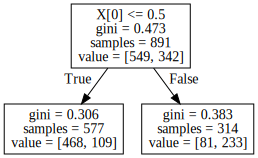

In [57]:
# graph = export_graphviz(tree)
# graphviz.Source(graph)

# Decision Tree 
* `criterion='gini'`
* `criterion='entropy'`
* 참고자료: https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

In [55]:
# What is impurity?

# Random Forest
참고자료
* https://excelsior-cjh.tistory.com/166
* https://github.com/ExcelsiorCJH/Hands-On-ML/tree/master/Chap07-Ensemble_Learning_and_Random_Forests

In [51]:
forest = RandomForestClassifier(random_state=42, n_estimators=10)

In [52]:
forest = forest.fit(train_X, train_y)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
forest.feature_importances_

array([1.])

In [54]:
predict_forest = forest.predict(test_X)

# Submission

In [25]:
submission = pd.read_csv('../Data/kaggle/gender_submission.csv')

In [26]:
# submission['Survived'] = predict_tree

In [27]:
# submission.to_csv('./submission.csv', index=False)